In [6]:
#### Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn import cluster
import seaborn as sns

In [2]:
### Loading the data
df = pd.read_csv('/Users/erictaylor/Downloads/Spotify-2000.csv')
print(df.head())

   Index                   Title             Artist            Top Genre   
0      1                 Sunrise        Norah Jones      adult standards  \
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)   
0  2004                     157      30            53            -14  \
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

In [3]:
### Dropping the unnecessary columns
df = df.drop('Index',axis=1)

In [5]:
### Correlation matrix
numeric_columns = df.select_dtypes(include=np.number).columns
print(df[numeric_columns].corr())


                            Year  Beats Per Minute (BPM)    Energy   
Year                    1.000000                0.012570  0.147235  \
Beats Per Minute (BPM)  0.012570                1.000000  0.156644   
Energy                  0.147235                0.156644  1.000000   
Danceability            0.077493               -0.140602  0.139616   
Loudness (dB)           0.343764                0.092927  0.735711   
Liveness                0.019017                0.016256  0.174118   
Valence                -0.166163                0.059653  0.405175   
Acousticness           -0.132946               -0.122472 -0.665156   
Speechiness             0.054097                0.085598  0.205865   
Popularity             -0.158962               -0.003181  0.103393   

                        Danceability  Loudness (dB)  Liveness   Valence   
Year                        0.077493       0.343764  0.019017 -0.166163  \
Beats Per Minute (BPM)     -0.140602       0.092927  0.016256  0.059653   
Ener

<Axes: >

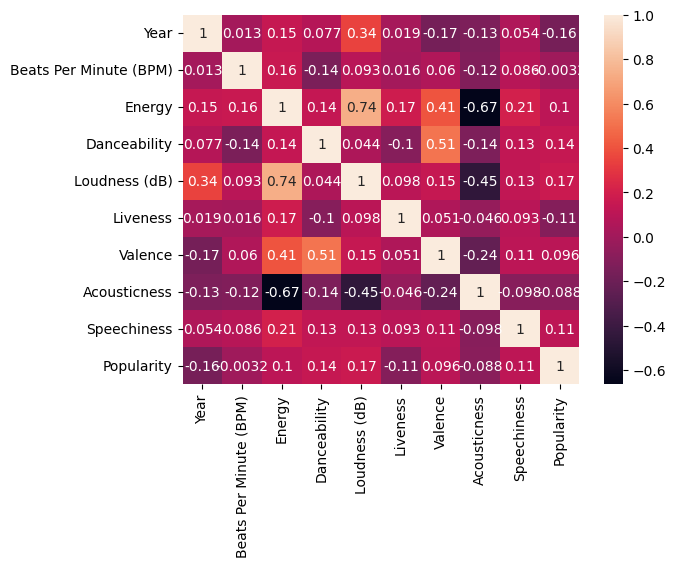

In [7]:
### Heatmap
sns.heatmap(df[numeric_columns].corr(),annot=True)

In [8]:
### Instatiating the model
df2 = df[['Beats Per Minute (BPM)','Loudness (dB)','Liveness','Valence','Acousticness','Speechiness']]
from sklearn.preprocessing import MinMaxScaler
for i in df.columns:
    MinMaxScaler(i)
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=10)
clusters = kmean.fit_predict(df2)

/Users/erictaylor/opt/anaconda3/envs/tensorflow_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
### Adding the clusters to the dataframe
df['Music Segments'] = clusters
MinMaxScaler(df['Music Segments'])
df["Music Segments"] = df["Music Segments"].map({1: "Cluster 1", 2: 
    "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5", 
    6: "Cluster 6", 7: "Cluster 7", 8: "Cluster 8", 
    9: "Cluster 9", 10: "Cluster 10"})

In [10]:
### Printing the head of the data
print(df.head())

                    Title             Artist            Top Genre  Year   
0                 Sunrise        Norah Jones      adult standards  2004  \
1             Black Night        Deep Purple           album rock  2000   
2          Clint Eastwood           Gorillaz  alternative hip hop  2001   
3           The Pretender       Foo Fighters    alternative metal  2007   
4  Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

   Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness   
0                     157      30            53            -14        11  \
1                     135      79            50            -11        17   
2                     168      69            66             -9         7   
3                     173      96            43             -4         3   
4                     106      82            58             -5        10   

   Valence Length (Duration)  Acousticness  Speechiness  Popularity   
0       68           

In [11]:
### Graphing the clusters
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(df["Music Segments"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = df[df["Music Segments"]== i]['Beats Per Minute (BPM)'],
                                y = df[df["Music Segments"] == i]['Energy'],
                                z = df[df["Music Segments"] == i]['Danceability'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}',
              'marker': {'line': {'width': 1}, 'size': 6},
              'mode': 'markers',
              'name': 'Cluster 9',
              'type': 'scatter3d',
              'x': array([157, 176, 178, 160, 171, 173, 162, 144, 174, 179, 170, 186, 151, 199,
                          160, 166, 155, 174, 174, 161, 170, 163, 150, 155, 159, 169, 184, 167,
                          181, 146, 148, 169, 159, 180, 178, 177, 200, 184, 151, 178, 194, 190,
                          204, 159, 171, 161, 172, 175, 156, 176, 148, 174, 164, 166, 177, 167,
                          179, 154, 175, 172, 174, 144, 176, 170, 154, 168, 175, 168, 174]),
              'y': array([30, 74, 68, 61, 20, 30, 33, 34,  6, 47, 68, 40, 46, 36, 64, 29, 54, 28,
                          13, 38, 46, 51, 66, 28, 17, 26, 34, 47, 39, 31, 41, 38, 16, 43, 34, 32,
                          42,  9, 32, 29, 93, 24, 41, 57, 34, 26, 14, 45, 41, 47, 48, 33, 43, 50,
                          21, 61, 54, 24, 10, 40, 38, 26, 91, 34, 36,  7, 76, 80, 26]),
              'z': array([53, 66, 30, 36, 34, 32, 56, 64, 35, 33, 44, 32, 69, 28, 59, 38, 27, 36,
                          50, 35, 18, 49, 25, 50, 48, 47, 38, 30, 36, 30, 66, 23, 41, 22, 39, 29,
                          29, 39, 38, 30, 49, 45, 62, 35, 28, 54, 39, 42, 45, 35, 39, 38, 26, 40,
                          49, 24, 45, 50, 38, 39, 21, 36, 21, 25, 45, 17, 36, 53, 45])},
             {'hovertemplate': 'Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}',
              'marker': {'line': {'width': 1}, 'size': 6},
              'mode': 'markers',
              'name': 'Cluster 2',
              'type': 'scatter3d',
              'x': array([135, 106, 112, ..., 133, 121, 117]),
              'y': array([79, 82, 67, ..., 66, 39, 39]),
              'z': array([50, 58, 91, ..., 64, 72, 68])},
             {'hovertemplate': 'Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}',
              'marker': {'line': {'width': 1}, 'size': 6},
              'mode': 'markers',
              'name': 'Cluster 4',
              'type': 'scatter3d',
              'x': array([168, 173, 154, 156, 152, 168, 194, 183, 159, 160, 160, 160, 162, 171,
                          193, 165, 173, 190, 159, 170, 166, 170, 170, 186, 180, 173, 169, 184,
                          184, 149, 205, 171, 179, 149, 150, 171, 153, 182, 172, 172, 174, 186,
                          169, 153, 166, 183, 156, 172, 168, 168, 172, 184, 180, 154, 170, 168,
                          152, 162, 175, 156, 171, 168, 164, 158, 163, 150, 150, 170, 167, 190,
                          168, 171, 174, 152, 178, 198, 180, 197, 163, 154, 175, 161, 161, 161,
                          168, 173, 159, 152, 172, 175, 148, 167, 175, 170, 179, 174, 159, 176,
                          149, 196, 180, 150, 198, 153, 180, 186, 160, 174, 170, 152, 181, 153,
                          157, 165, 160, 171, 203, 176, 159, 167, 150, 168, 175, 163, 160, 174,
                          155, 169, 171, 158, 164, 166, 174, 150, 204, 150, 181, 169, 184, 167,
                          165]),
              'y': array([69, 96, 70, 79, 81, 57, 43, 44, 67, 71, 85, 74, 62, 74, 58, 56, 55, 76,
                          64, 61, 57, 66, 54, 87, 66, 66, 65, 82, 44, 88, 47, 64, 54, 81, 81, 48,
                          91, 24, 66, 76, 45, 54, 88, 84, 56, 50, 91, 96, 94, 82, 76, 51, 42, 58,
                          75, 77, 86, 82, 52, 87, 50, 76, 72, 45, 79, 83, 43, 49, 68, 53, 82, 75,
                          44, 60, 64, 61, 63, 64, 66, 38, 59, 84, 56, 43, 47, 87, 84, 67, 84, 66,
                          91, 74, 72, 28, 36, 94, 54, 26, 94, 93, 95, 80, 52, 64, 76, 44, 61, 89,
                          39, 52, 53, 78, 88, 60, 98, 50, 64, 60, 96, 64, 63, 94, 87, 92, 61, 42,
                          47, 72, 92, 88, 85, 49, 38, 59, 47, 79, 85, 77, 53, 52, 38]),
         